# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

### Question 1

#### Read the dataset

In [111]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"C:\Users\admin\Downloads\07-01-2020.csv")
df.shape[0]


3826

#### Display the top 5 rows in the data

In [112]:
df.head(5)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-07-02 04:33:46,34.223334,-82.461707,113,0,0,113,"Abbeville, South Carolina, US",460.716761,0.000000
1,22001.0,Acadia,Louisiana,US,2020-07-02 04:33:46,30.295065,-92.414197,919,37,0,882,"Acadia, Louisiana, US",1481.183012,4.026115
2,51001.0,Accomack,Virginia,US,2020-07-02 04:33:46,37.767072,-75.632346,1043,14,0,1029,"Accomack, Virginia, US",3227.503404,1.342282
3,16001.0,Ada,Idaho,US,2020-07-02 04:33:46,43.452658,-116.241552,2288,23,0,2265,"Ada, Idaho, US",475.095881,1.005245
4,19001.0,Adair,Iowa,US,2020-07-02 04:33:46,41.330756,-94.471059,15,0,0,15,"Adair, Iowa, US",209.731544,0.000000


#### Show the information of the dataset

In [113]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3826 entries, 0 to 3825
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3110 non-null   float64
 1   Admin2               3114 non-null   object 
 2   Province_State       3649 non-null   object 
 3   Country_Region       3826 non-null   object 
 4   Last_Update          3826 non-null   object 
 5   Lat                  3748 non-null   float64
 6   Long_                3748 non-null   float64
 7   Confirmed            3826 non-null   int64  
 8   Deaths               3826 non-null   int64  
 9   Recovered            3826 non-null   int64  
 10  Active               3826 non-null   int64  
 11  Combined_Key         3826 non-null   object 
 12  Incidence_Rate       3748 non-null   float64
 13  Case-Fatality_Ratio  3758 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 418.6+ KB
None


#### Show the sum of missing values of features in the dataset

In [114]:

missing_values = df.isnull().sum()
print(missing_values)


FIPS                   716
Admin2                 712
Province_State         177
Country_Region           0
Last_Update              0
Lat                     78
Long_                   78
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
Combined_Key             0
Incidence_Rate          78
Case-Fatality_Ratio     68
dtype: int64


### Question 2

#### Show the number of Confirmed cases by Country

In [115]:
Cases_country =df.groupby('Country_Region')['Confirmed'].sum()
print(Cases_country)

Country_Region
Afghanistan             31848
Albania                  2580
Algeria                 14272
Andorra                   855
Angola                    291
                        ...  
West Bank and Gaza       2758
Winter Olympics 2022        0
Yemen                    1190
Zambia                   1632
Zimbabwe                  605
Name: Confirmed, Length: 197, dtype: int64


#### Show the number of Deaths by Country

In [116]:
deaths_country = df.groupby('Country_Region')['Deaths'].sum()

print(deaths_country)

Country_Region
Afghanistan             778
Albania                  65
Algeria                 920
Andorra                  52
Angola                   15
                       ... 
West Bank and Gaza        8
Winter Olympics 2022      0
Yemen                   318
Zambia                   30
Zimbabwe                  7
Name: Deaths, Length: 197, dtype: int64


#### Show the number of Recovered cases by Country

In [117]:
recov_cases = df.groupby('Country_Region')['Recovered'].sum()
print(recov_cases)

Country_Region
Afghanistan             15651
Albania                  1516
Algeria                 10040
Andorra                   799
Angola                     97
                        ...  
West Bank and Gaza        460
Winter Olympics 2022        0
Yemen                     504
Zambia                   1348
Zimbabwe                  166
Name: Recovered, Length: 197, dtype: int64


#### Show the number of Active Cases by Country

In [144]:
active_cases = df.groupby('Country_Region')['Active'].sum()
print(active_cases)

Country_Region
Afghanistan             15419
Albania                   999
Algeria                  3312
Andorra                     4
Angola                    179
                        ...  
West Bank and Gaza       2290
Winter Olympics 2022        0
Yemen                     368
Zambia                    254
Zimbabwe                  432
Name: Active, Length: 197, dtype: int64


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [145]:
Country_summary = df.groupby('Country_Region')[['Confirmed', 'Deaths', 'Recovered' ,'Active']].sum()
print(Country_summary)

                      Confirmed  Deaths  Recovered  Active
Country_Region                                            
Afghanistan               31848     778      15651   15419
Albania                    2580      65       1516     999
Algeria                   14272     920      10040    3312
Andorra                     855      52        799       4
Angola                      291      15         97     179
...                         ...     ...        ...     ...
West Bank and Gaza         2758       8        460    2290
Winter Olympics 2022          0       0          0       0
Yemen                      1190     318        504     368
Zambia                     1632      30       1348     254
Zimbabwe                    605       7        166     432

[197 rows x 4 columns]


### Question 3

### Show the countries with no recovered cases

In [146]:
country_no_recov = recov_cases[recov_cases == 0]
print(country_no_recov)

Country_Region
Antarctica              0
Kiribati                0
Korea, North            0
MS Zaandam              0
Nauru                   0
Palau                   0
Samoa                   0
Summer Olympics 2020    0
Sweden                  0
Tonga                   0
Tuvalu                  0
Winter Olympics 2022    0
Name: Recovered, dtype: int64


#### Show the countries with no confirmed cases

In [147]:
no_cases = Cases_country[Cases_country==0]
print(no_cases)

Country_Region
Antarctica              0
Kiribati                0
Korea, North            0
Nauru                   0
Palau                   0
Samoa                   0
Summer Olympics 2020    0
Tonga                   0
Tuvalu                  0
Winter Olympics 2022    0
Name: Confirmed, dtype: int64


#### Show the countries with no deaths

In [148]:
no_deaths = deaths_country[deaths_country==0]
print(no_deaths)

Country_Region
Antarctica                          0
Bhutan                              0
Cambodia                            0
Dominica                            0
Eritrea                             0
Fiji                                0
Grenada                             0
Holy See                            0
Kiribati                            0
Korea, North                        0
Laos                                0
Lesotho                             0
Mongolia                            0
Namibia                             0
Nauru                               0
Palau                               0
Papua New Guinea                    0
Saint Kitts and Nevis               0
Saint Lucia                         0
Saint Vincent and the Grenadines    0
Samoa                               0
Seychelles                          0
Summer Olympics 2020                0
Timor-Leste                         0
Tonga                               0
Tuvalu                             

### Question 4

#### Show the Top 10 countries with Confirmed cases

In [149]:

top_10_confirmed_cases = Cases_country.sort_values(ascending=False).head(10)

print(top_10_confirmed_cases)


Country_Region
US                2702432
Brazil            1459494
Russia             653479
India              604641
United Kingdom     314989
Peru               288477
Chile              282043
Spain              249659
Italy              240760
Mexico             231770
Name: Confirmed, dtype: int64


#### Show the Top 10 Countries with Active cases

In [150]:


top_10_active_cases = active_cases.sort_values(ascending=False).head(10)

print(top_10_active_cases)

Country_Region
US                2570899
Brazil             462273
United Kingdom     269629
Peru               250028
India              226947
Russia             221723
Pakistan           108642
France              98695
Bangladesh          85262
South Africa        80559
Name: Active, dtype: int64


### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [151]:
import matplotlib.pyplot as plt

In [170]:
Country_summary_plot = df.groupby('Country_Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()


Country_summary_plot = Country_summary_plot[Country_summary_plot['Deaths'] > 50000]

print(Country_summary_plot)



                Confirmed  Deaths  Recovered   Active
Country_Region                                       
Brazil            1459494   60878     926192   462273
US                2702432  127746     729994  2570899
United Kingdom     314989   56338       1372   269629


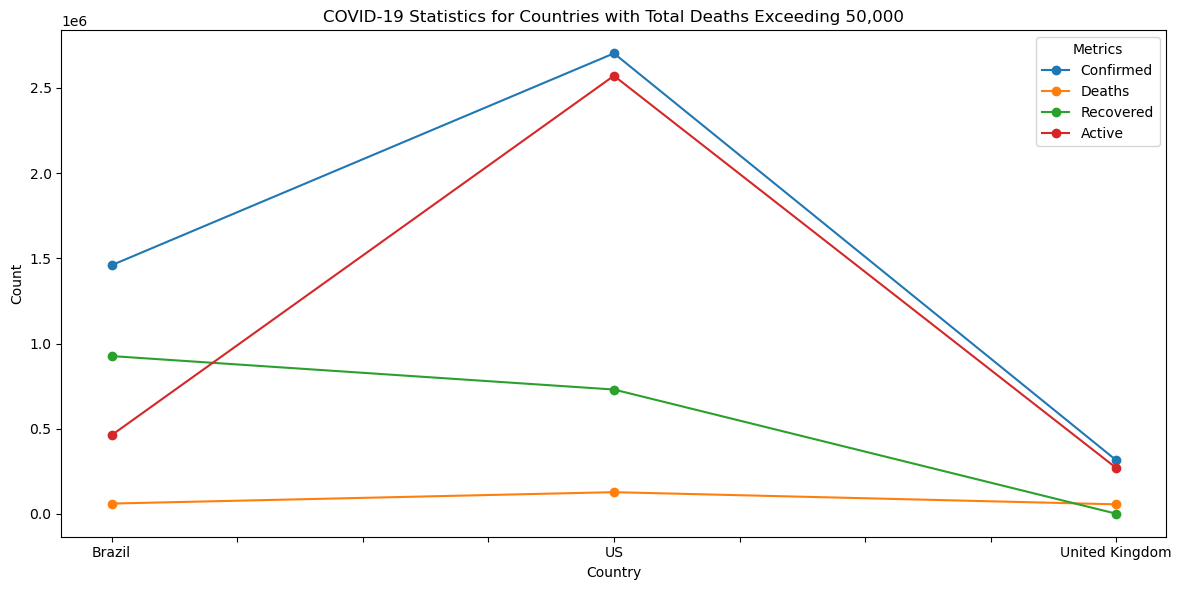

In [177]:
Country_summary_plot[['Confirmed','Deaths','Recovered','Active']].plot(kind = 'line', figsize = (12,6), marker = 'o')

plt.title('COVID-19 Statistics for Countries with Total Deaths Exceeding 50,000')
plt.xlabel('Country')
plt.ylabel('Count')


plt.tight_layout()
plt.legend(title='Metrics')  

plt.show()

### Question 6

### Plot Province/State wise Deaths in USA

In [178]:
import plotly.express as px

In [179]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [180]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [198]:
df = covid_data 
df_US = df[df['Country_Region'] == 'US']
df_US_states = df_US.groupby('Province_State')['Deaths'].sum()
print(df_US_states)



Province_State
Alabama                      5299
Alaska                        224
Arizona                     10036
Arkansas                     4010
California                  29638
Colorado                     5600
Connecticut                  6324
Delaware                     1128
Diamond Princess                0
District of Columbia          813
Florida                     22804
Georgia                     11457
Grand Princess                  3
Guam                          124
Hawaii                        308
Idaho                        1528
Illinois                    19210
Indiana                     10089
Iowa                         4127
Kansas                       3164
Kentucky                     2876
Louisiana                    7833
Maine                         432
Maryland                     6246
Massachusetts               11071
Michigan                    14145
Minnesota                    5731
Mississippi                  5146
Missouri                     6173

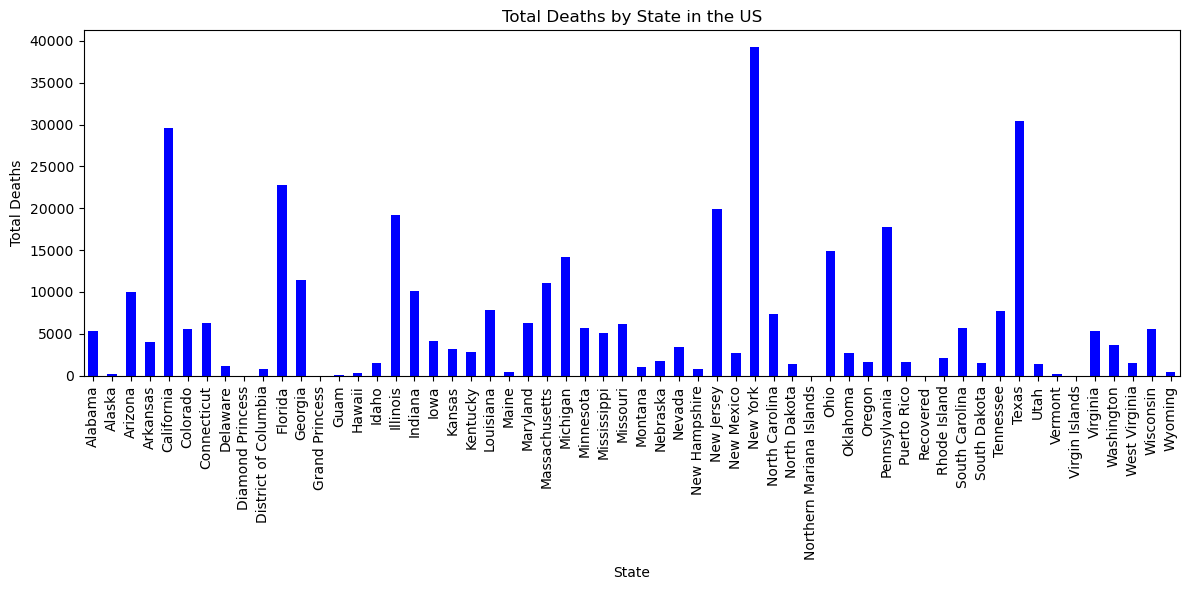

In [212]:
plt.figure(figsize=(12,6))
df_US_states.plot(kind='bar', color='blue')
plt.title('Total Deaths by State in the US')
plt.xlabel('State')
plt.ylabel('Total Deaths')
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()


### Question 7

### Plot Province/State Wise Active Cases in USA

Province_State
Alabama                      393851
Alaska                        49755
Arizona                      597309
Arkansas                     247736
California                  2750669
Colorado                     353757
Connecticut                  199670
Delaware                      63347
Diamond Princess                 49
District of Columbia          30644
Florida                     1441893
Georgia                      737395
Grand Princess                  100
Guam                           7275
Hawaii                        23589
Idaho                        147707
Illinois                    1006442
Indiana                      548634
Iowa                         292044
Kansas                       241572
Kentucky                     297521
Louisiana                    333598
Maine                         28587
Maryland                     297162
Massachusetts                414061
Michigan                     548408
Minnesota                    428682
Mississippi  

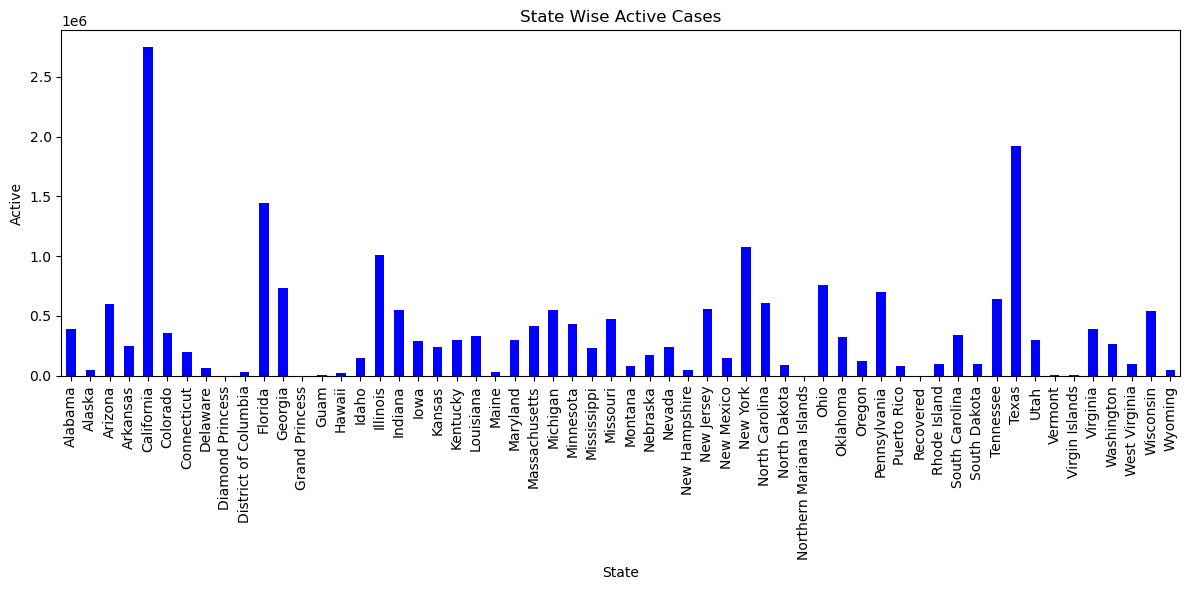

In [215]:
active = df_US.groupby('Province_State')['Active'].sum()
print(active)

plt.figure(figsize=(12,6))
active.plot(kind = 'bar', color = 'blue')
plt.title('State Wise Active Cases')
plt.xlabel('State')
plt.ylabel('Active')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Question 8

### Plot Province/State Wise Confirmed cases in USA

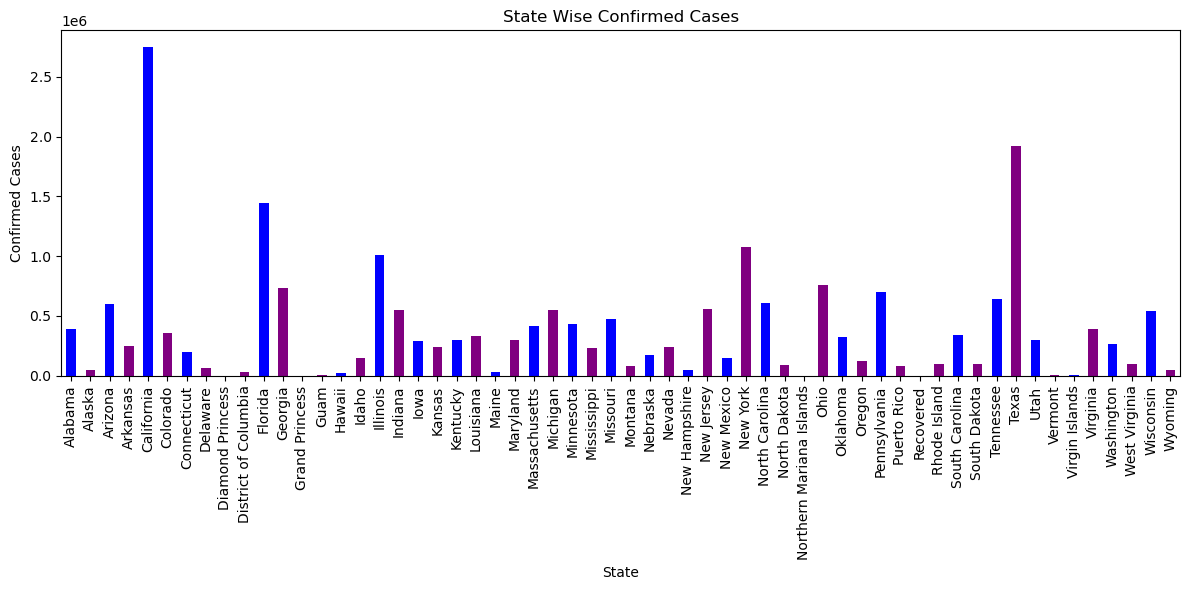

In [218]:
confirmed = df_US.groupby('Province_State')['Confirmed'].sum()

plt.figure(figsize=(12,6))
colors = ['blue', 'purple'] * (len(confirmed) // 2) + ['blue'] * (len(confirmed) % 2)

active.plot(kind = 'bar', color = colors)
plt.title('State Wise Confirmed Cases')
plt.xlabel('State')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Question 9

### Plot Worldwide Confirmed Cases over time

In [24]:
import plotly.express as px
import plotly.io as pio

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

